# NSL-KDD - Data Review

## Loading Libraries and Dataset

In [63]:
# For getting paths
import os

# For data manipulation and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# For feature engineering
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# For model building
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For model evaluation
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# For oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
import scipy

# For timing
import time

## Dataset Analysis

In [64]:
# Column Labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

# Datasets
train_path = "../datasets/nsl-kdd/KDDTrain+.txt"
test_path = "../datasets/nsl-kdd/KDDTest+.txt"

df_train=pd.read_csv(train_path,header=None,names=columns)
df_test=pd.read_csv(test_path,header=None,names=columns)

In [65]:
df_train.info()
print("---------------------------")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### Checks - Duplicates, Missing, Distribution, Types

In [66]:
# Check for duplicates
print("Duplicates in Train: ", df_train.duplicated().sum())
print("Duplicates in Test: ", df_test.duplicated().sum())

# Check for missing values
print("-----------------------------------")
print("Rows with missing values - train: ", df_train.isnull().sum())
print("-----------------------------------")
print("Rows with missing values - test: ", df_test.isnull().sum())

Duplicates in Train:  0
Duplicates in Test:  0
-----------------------------------
Rows with missing values - train:  duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate             

### Training Attack Distribution

-----------------------------------
Distribution of Dataset - train: 
attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


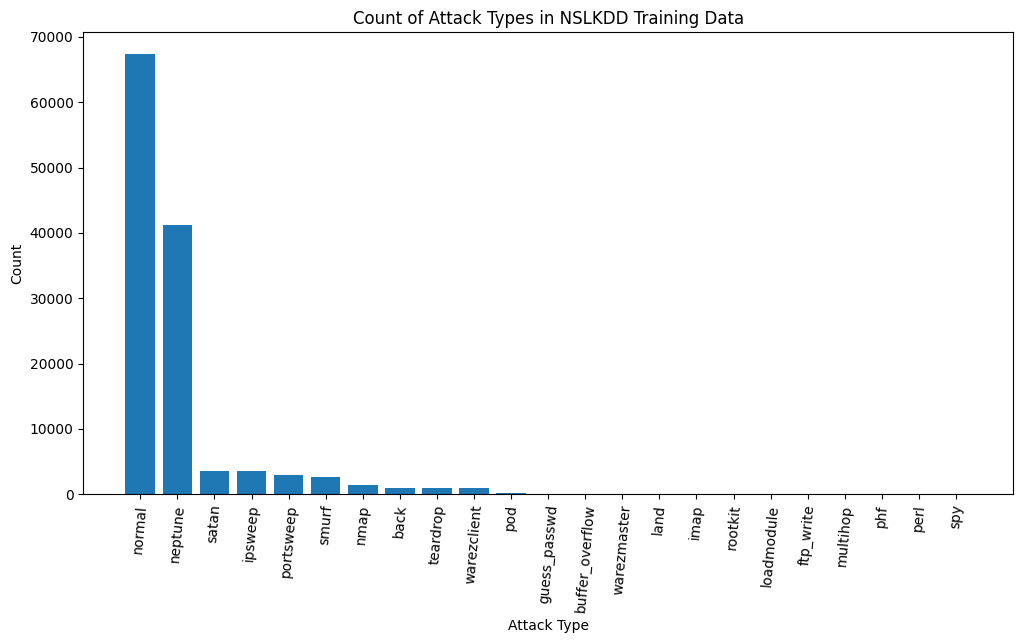

In [67]:
# Check for distribution - Train
print("-----------------------------------")
print("Distribution of Dataset - train: ")
attack_counts_train = df_train['attack'].value_counts()
print(attack_counts_train)

# Create a bar plot
plt.figure(figsize=(12,6))
plt.bar(attack_counts_train.index, attack_counts_train.values)
plt.xticks(rotation=85)
plt.title("Count of Attack Types in NSLKDD Training Data")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

### Testing Attack Distribution

-----------------------------------
Distribution of Dataset - Test: 
attack
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count,

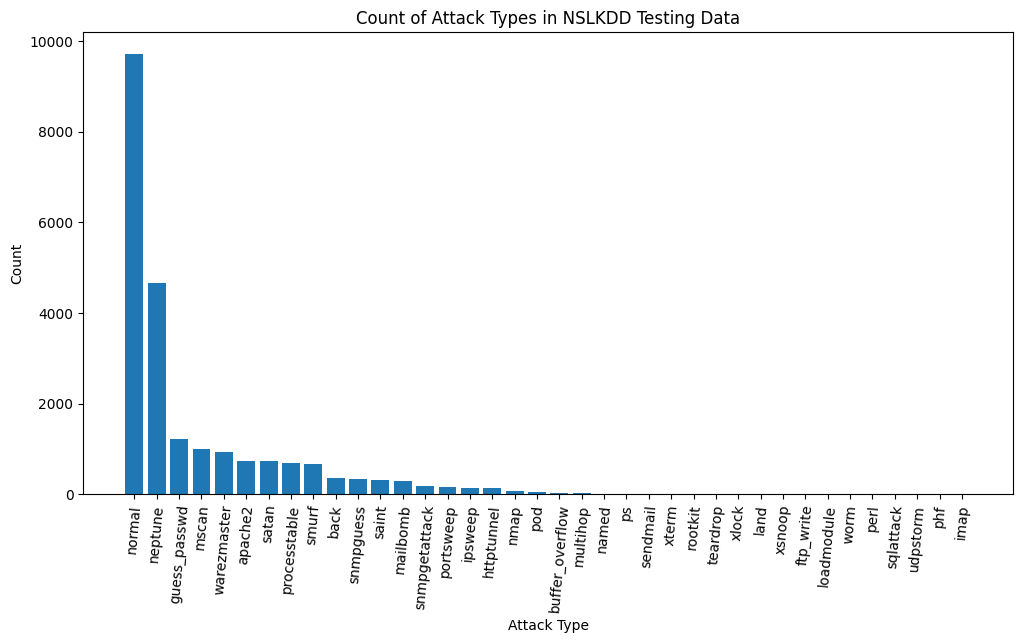

In [68]:
# Check for distribution - Test
print("-----------------------------------")
print("Distribution of Dataset - Test: ")
attack_counts_test = df_test['attack'].value_counts()
print(attack_counts_test)

# Create a bar plot
plt.figure(figsize=(12,6))
plt.bar(attack_counts_test.index, attack_counts_test.values)
plt.xticks(rotation=85)
plt.title("Count of Attack Types in NSLKDD Testing Data")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

## Attack Reduction for XGBoost

In [69]:
# List of DDoS/DoS attacks for the training dataset
train_ddos = [
    "neptune",
    "smurf",
    "pod",
    "teardrop",
    "land",
    "back"
]

# List of DDoS/DoS attacks for the test dataset, including unknowns
test_ddos = [
    "apache2",
    "processtable",
    "mailbomb",
    "udpstorm",
    "worm",
    "processtable"
]

# Combine DDoS/DoS attacks for filtering
all_train_attacks = train_ddos
all_test_attacks = all_train_attacks #+ test_ddos

# Filtering df_train to keep only 'normal', train_ddos, and scanning attacks
df_train = df_train[df_train['attack'].isin(['normal'] + all_train_attacks)]

# Filtering df_test to keep only 'normal' and test_ddos, including known DDoS attacks
df_test = df_test[df_test['attack'].isin(['normal'] + all_test_attacks)]

# Group non-DDoS/DoS attacks and scanning attacks in the test set as 'suspicious'
df_test['attack'] = df_test['attack'].apply(
    lambda x: 'suspicious' if x not in ['normal'] + train_ddos else x
)

# Displaying the filtered DataFrames
print("Filtered df_train for DDoS and scanning attacks:")
print(df_train['attack'].value_counts())

print("-------------------------------")

print("\nFiltered df_test for DDoS (excluding known DDoS attacks):")
print(df_test['attack'].value_counts())


Filtered df_train for DDoS and scanning attacks:
attack
normal      67343
neptune     41214
smurf        2646
back          956
teardrop      892
pod           201
land           18
Name: count, dtype: int64
-------------------------------

Filtered df_test for DDoS (excluding known DDoS attacks):
attack
normal      9711
neptune     4657
smurf        665
back         359
pod           41
teardrop      12
land           7
Name: count, dtype: int64


In [70]:
def add_bar_labels(bars):
    # Add counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height}',
            ha='center',
            va='bottom'
        )

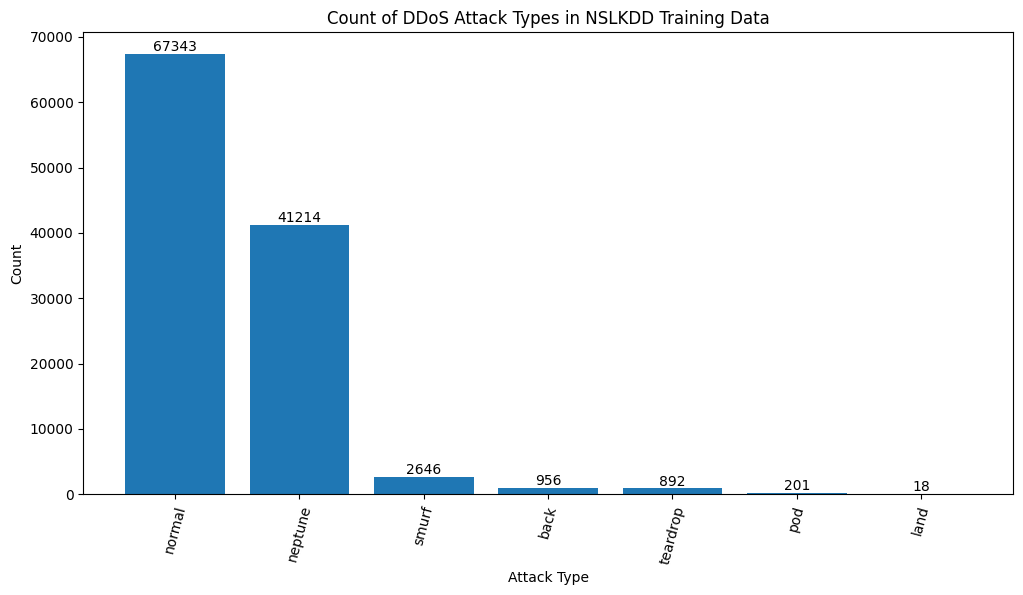

In [71]:
# Plot of Training DDoS Attack Distribution
attack_counts_train = df_train['attack'].value_counts()
plt.figure(figsize=(12, 6))
bars = plt.bar(attack_counts_train.index, attack_counts_train.values)
add_bar_labels(bars)
plt.xticks(rotation=75)
plt.title("Count of DDoS Attack Types in NSLKDD Training Data")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

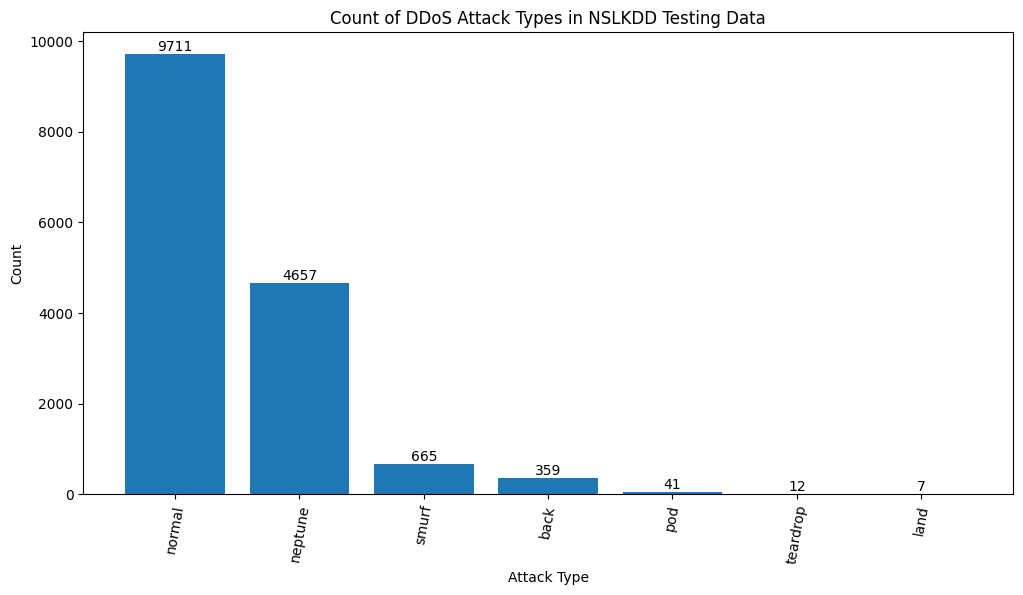

In [72]:
# Plot of Testing DDoS Attacks
attack_counts_test = df_test['attack'].value_counts()

plt.figure(figsize=(12,6))
plt.title("Count of DDoS Attack Types in NSLKDD Testing Data")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=80)
bars = plt.bar(attack_counts_test.index, attack_counts_test.values)
add_bar_labels(bars)
plt.show()

In [73]:
# Check Types of Object
df_train.select_dtypes(['object']).columns

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

## Encode Data

In [74]:
# Encode categorical features (including 'attack')
columns_to_encode = ['protocol_type', 'service', 'flag', 'attack']
label_map = {}

for column in columns_to_encode:
    le = LabelEncoder()
    
    # Fit the label encoder only on the training data
    le.fit(df_train[column])
    
    df_train[column] = le.transform(df_train[column])
    
    # Transform test data with handling for unseen labels
    df_test[column] = df_test[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Store the mapping for reference
    label_map[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the label map
for column, mapping in label_map.items():
    print(f"Mapping for {column}: {mapping}")


Mapping for protocol_type: {'icmp': 0, 'tcp': 1, 'udp': 2}
Mapping for service: {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'imap4': 24, 'iso_tsap': 25, 'klogin': 26, 'kshell': 27, 'ldap': 28, 'link': 29, 'login': 30, 'mtp': 31, 'name': 32, 'netbios_dgm': 33, 'netbios_ns': 34, 'netbios_ssn': 35, 'netstat': 36, 'nnsp': 37, 'nntp': 38, 'ntp_u': 39, 'other': 40, 'pop_2': 41, 'pop_3': 42, 'printer': 43, 'private': 44, 'red_i': 45, 'remote_job': 46, 'rje': 47, 'shell': 48, 'smtp': 49, 'sql_net': 50, 'ssh': 51, 'sunrpc': 52, 'supdup': 53, 'systat': 54, 'telnet': 55, 'tftp_u': 56, 'tim_i': 57, 'time': 58, 'urh_i': 59, 'urp_i': 60, 'uucp': 61, 'uucp_path': 62, 'vmnet': 63, 'whois': 64}
Mapping for flag: {'OTH': 0, 'REJ': 1, 'RSTO

## Removal of Features not in Network Traffic Analyzers

In [75]:
# "land," since this would have to be a check to see if src ip = dest ip
non_directly_obtainable_features = [
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'land',
    'level',   
]

x_train = df_train.drop(non_directly_obtainable_features, axis=1)
x_test = df_test.drop(non_directly_obtainable_features, axis=1)

## Splitting of Data

In [76]:
# Split the data into features (x) and target (y) - Level is unknown in real-time
x_train = x_train.drop('attack', axis=1)
y_train = df_train['attack']
x_test = x_test.drop('attack', axis=1)
y_test = df_test['attack']

## Feature Engineering

In [77]:
# Mutual Information for feature selection
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.745845
service                        0.612966
diff_srv_rate                  0.606380
flag                           0.602005
same_srv_rate                  0.601655
count                          0.488898
dst_host_same_srv_rate         0.485779
dst_host_diff_srv_rate         0.480482
dst_bytes                      0.470556
dst_host_serror_rate           0.460976
dst_host_srv_serror_rate       0.455459
dst_host_srv_count             0.448267
serror_rate                    0.442591
srv_serror_rate                0.439623
dst_host_same_src_port_rate    0.259511
srv_count                      0.235249
dst_host_count                 0.196889
protocol_type                  0.184845
dst_host_srv_diff_host_rate    0.181119
srv_diff_host_rate             0.127432
dst_host_srv_rerror_rate       0.090799
dst_host_rerror_rate           0.086456
wrong_fragment                 0.058160
duration                       0.039452
srv_rerror_rate                0.038726


<Axes: >

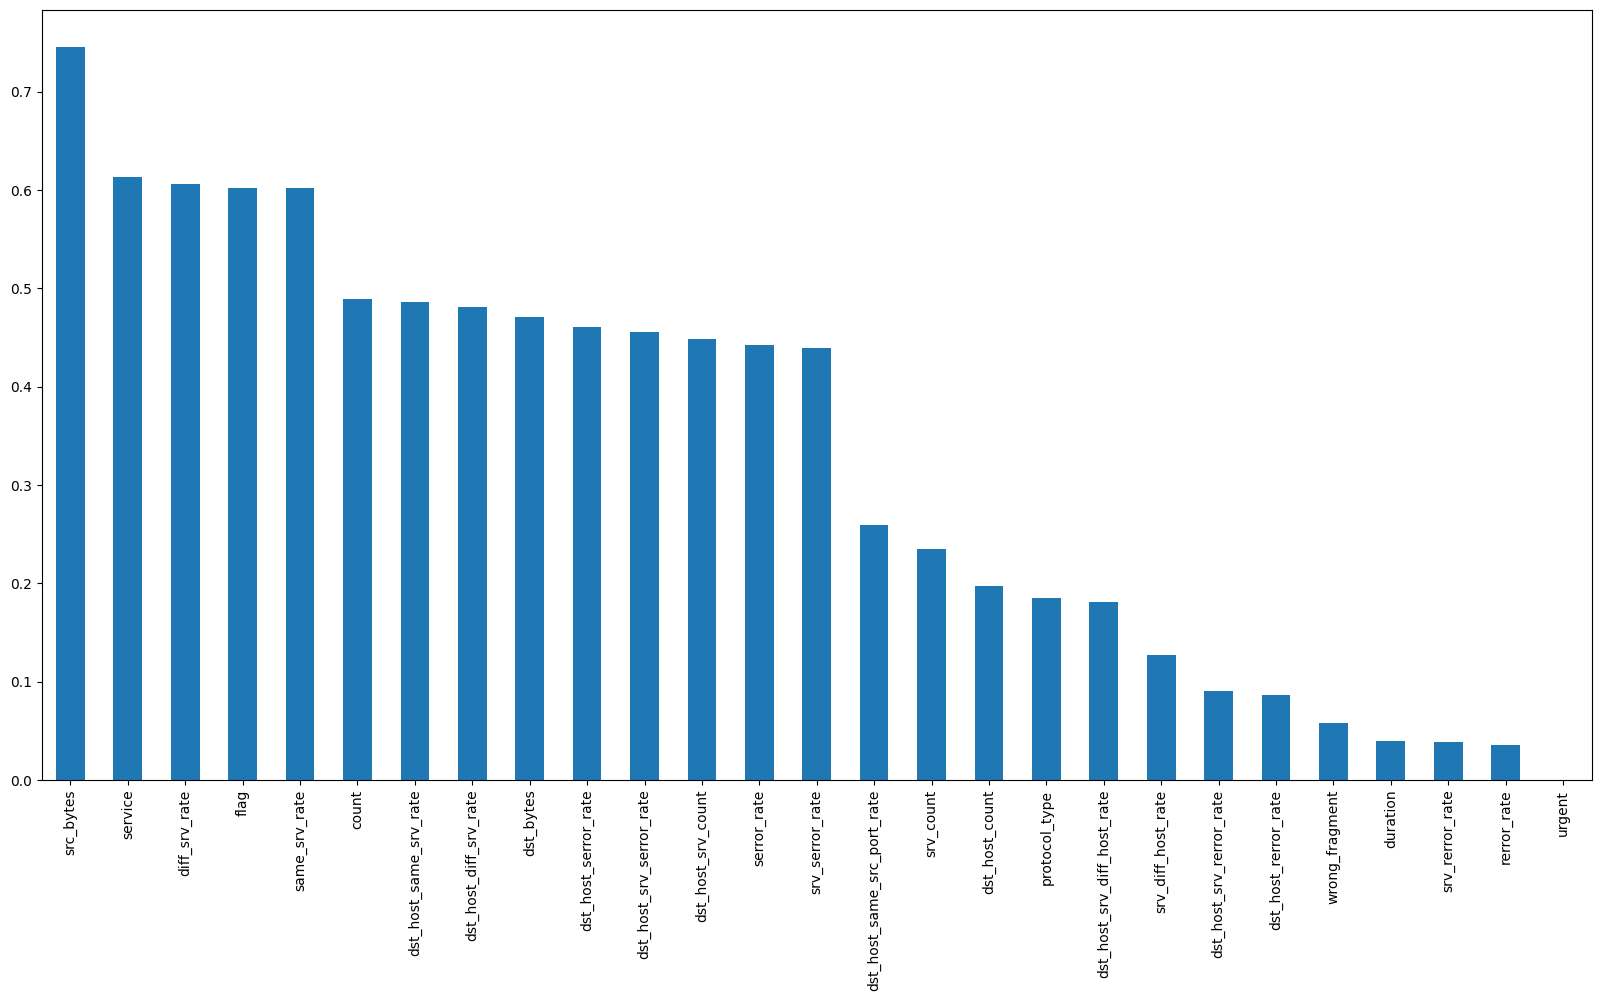

In [78]:
# Display in bar chart
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [79]:
# Just Drop Urgent
x_train = x_train.drop('urgent', axis=1)
x_test = x_test.drop('urgent', axis=1)


In [80]:
# SelectKBest for Top 20 Features
top_20_features = SelectKBest(mutual_info_classif, k=20)
top_20_features.fit(x_train, y_train)
x_train.columns[top_20_features.get_support()]

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')

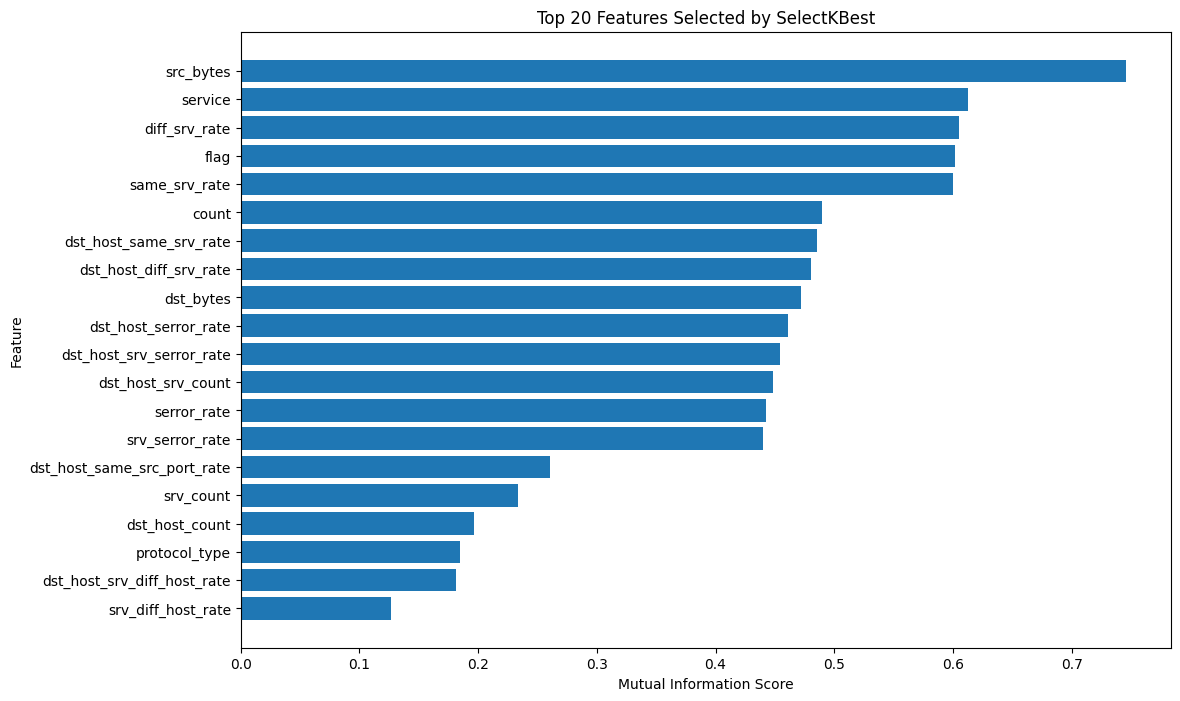

In [81]:
# Get the mask for the selected features
mask = top_20_features.get_support()

# Get the feature scores
feature_scores = top_20_features.scores_

# Get the selected feature names
selected_features = x_train.columns[mask]
selected_scores = feature_scores[mask]

# Create a DataFrame for plotting
df_top_features = pd.DataFrame({
    'Feature': selected_features,
    'Score': selected_scores
})

# Sort the DataFrame by scores in descending order
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Plot the top features
plt.figure(figsize=(12, 8))
plt.barh(df_top_features['Feature'], df_top_features['Score'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Top 20 Features Selected by SelectKBest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


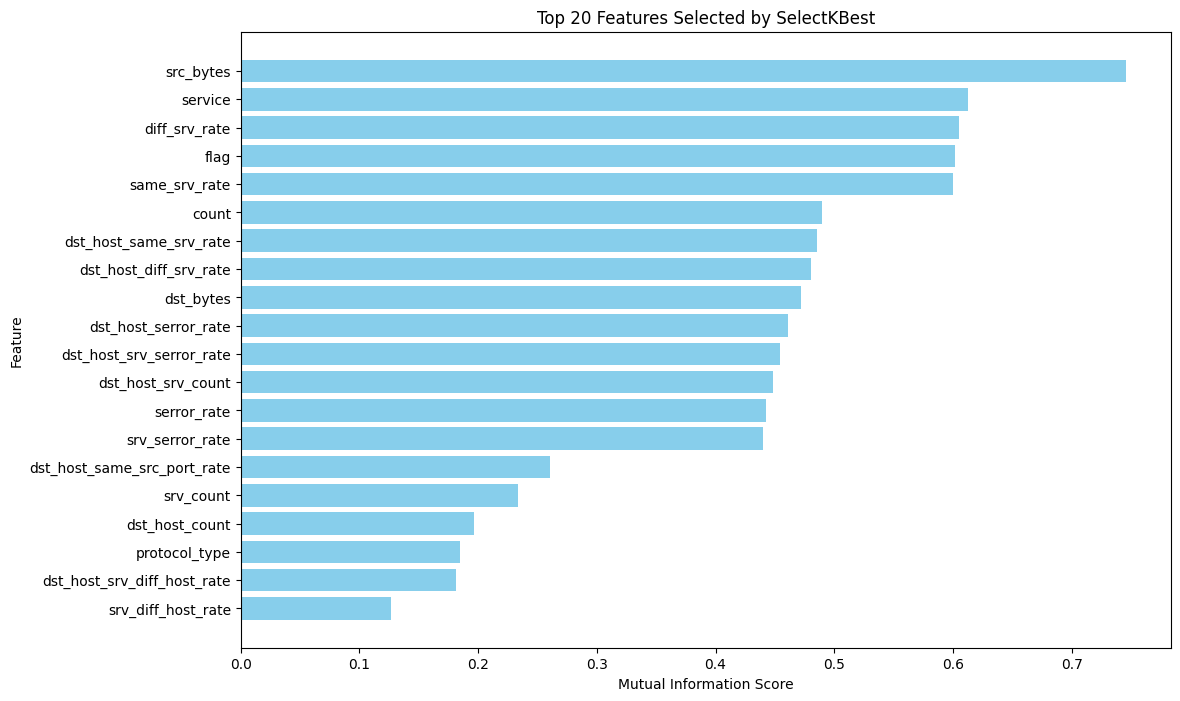

In [82]:
# Get the mask for the selected features
mask = top_20_features.get_support()

# Get the feature scores
feature_scores = top_20_features.scores_

# Get the selected feature names
selected_features = x_train.columns[mask]
selected_scores = feature_scores[mask]

# Create a DataFrame for plotting
df_top_features = pd.DataFrame({
    'Feature': selected_features,
    'Score': selected_scores
})

# Sort the DataFrame by scores in descending order
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Plot the top features
plt.figure(figsize=(12, 8))
plt.barh(df_top_features['Feature'], df_top_features['Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Top 20 Features Selected by SelectKBest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


In [83]:
top_20_features = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate']

x_train=x_train[top_20_features]
x_test=x_test[top_20_features]

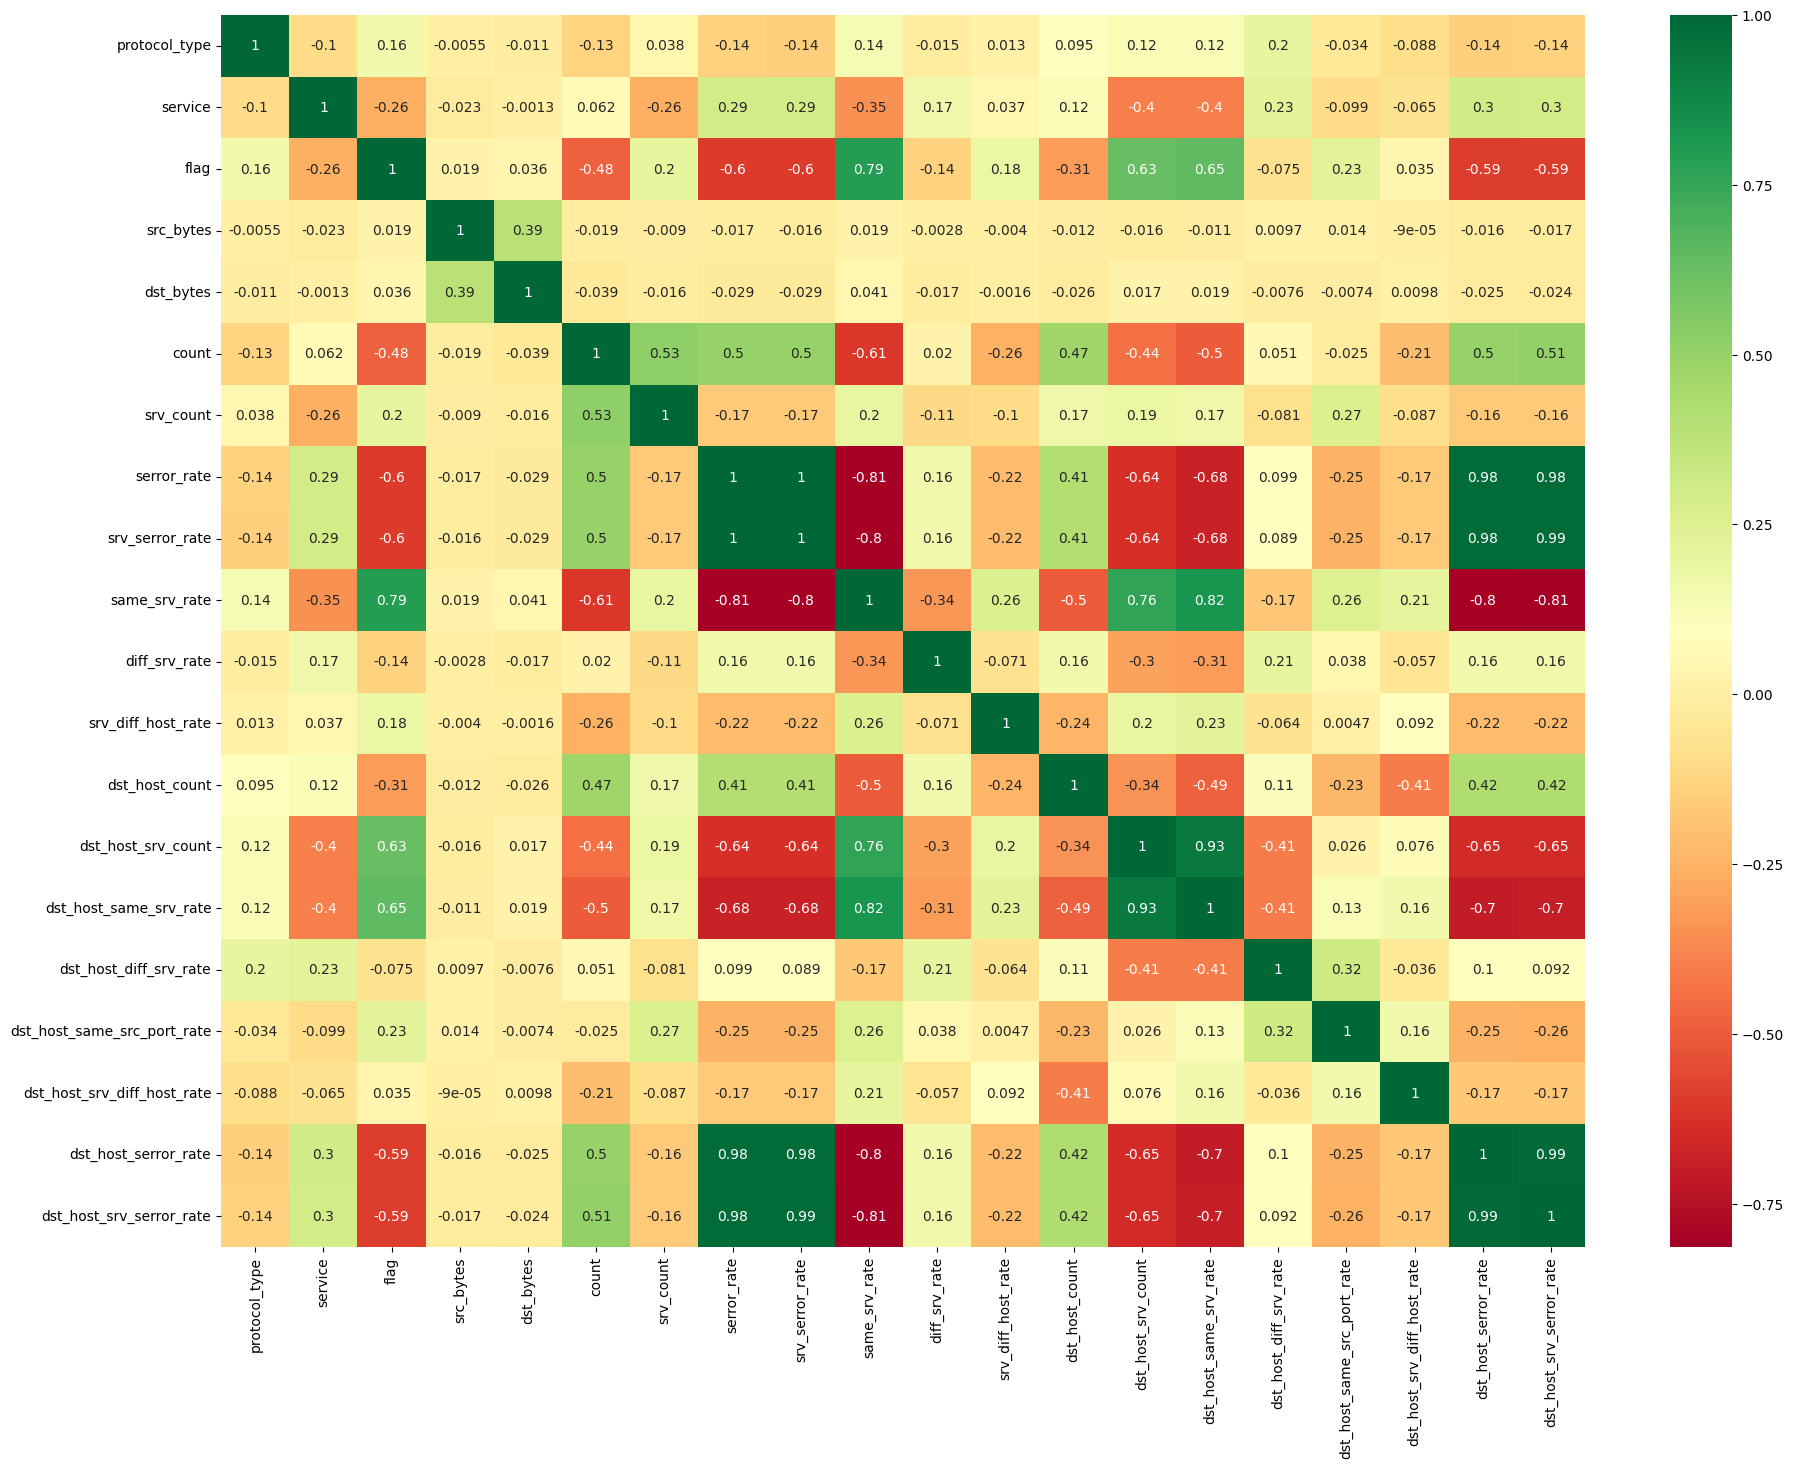

In [84]:
plt.figure(figsize=(22,16))
top_20_heatmap = sns.heatmap(x_train.corr(), annot=True, cmap='RdYlGn')

## Scaling

In [85]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
sampled = False

## SMOTE - Address Class Imblance

In [97]:
sampled = True

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Print the class distribution before and after SMOTE
print("Class distribution After SMOTE:")
print(np.bincount(y_train))

Class distribution After SMOTE:
[67343 67343 67343 67343 67343 67343 67343]


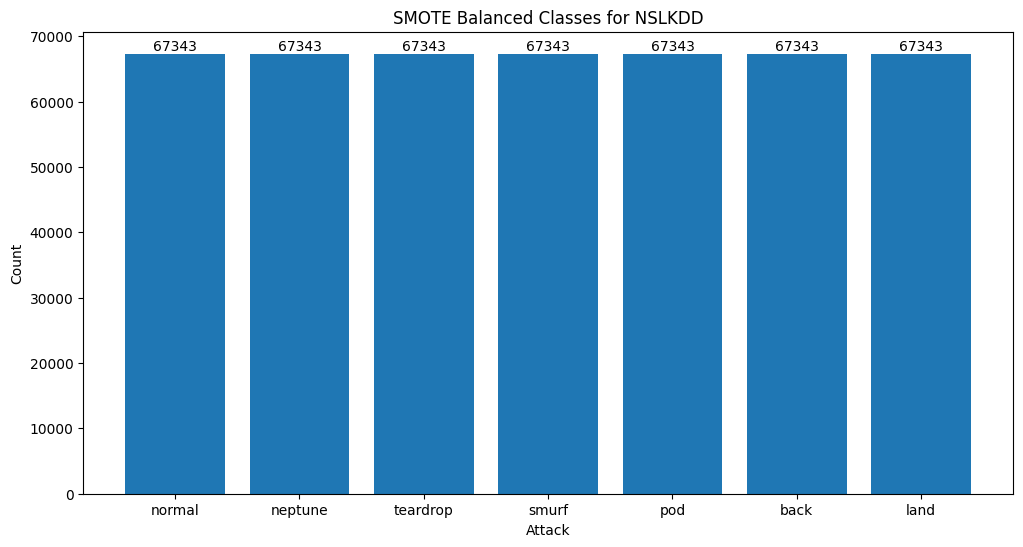

In [98]:
decoded_labels = le.inverse_transform(y_train)
attack_counts = pd.Series(decoded_labels).value_counts()

plt.figure(figsize=(12,6))
bars = plt.bar(attack_counts.index, attack_counts.values)
plt.title("SMOTE Balanced Classes for NSLKDD")
plt.xlabel("Attack")
plt.ylabel("Count")
plt.xticks(rotation=0)
add_bar_labels(bars)
plt.show()

## Multiclassifcation Models

In [ ]:
import json
import joblib

In [101]:
# Create the classifiers
models = {
    "XGBoost": XGBClassifier(
        eval_metric='mlogloss',
        use_label_encoder=False
    ),
#     "Logistic Regression": LogisticRegression(max_iter=2000),
#     "Random Forest": RandomForestClassifier(n_estimators=100),
#     "Decision Tree": DecisionTreeClassifier(),
}


# Train and evaluate each model
results = {}

if sampled:
    print("Oversampled Version")

for name, model in models.items():
    # Train the model
    start_train_time = time.time()
    model.fit(x_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    # Predict on the test set
    start_pred_time = time.time()
    y_pred = model.predict(x_test)
    end_pred_time = time.time()
    pred_time = end_pred_time - start_pred_time

    # Decode labels for evaluation
    y_test_decoded = le.inverse_transform(y_test)
    y_pred_decoded = le.inverse_transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
    precision = precision_score(y_test_decoded, y_pred_decoded, average='macro', zero_division=1)
    recall = recall_score(y_test_decoded, y_pred_decoded, average='macro', zero_division=1)
    f1 = f1_score(y_test_decoded, y_pred_decoded, average='macro', zero_division=1)
    conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
    class_report = classification_report(y_test_decoded, y_pred_decoded, zero_division=1)

    # Store the results
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "conf_matrix": conf_matrix,
        "class_report": class_report,
        "train_time": train_time,
        "pred_time": pred_time
    }

    # Print evaluation metrics
    print(f'--- {name} ---')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')
    print(f'Training Time: {train_time} seconds')
    print(f'Prediction Time: {pred_time} seconds')


--- XGBoost ---
Accuracy: 0.9778022262490292
Precision: 0.7840644201235732
Recall: 0.840344070679181
F1 Score: 0.7121591748996231
Confusion Matrix:
[[ 249    0    0  110    0    0    0]
 [   0    2    1    4    0    0    0]
 [   0    0 4652    5    0    0    0]
 [   8    0   13 9491   44    0  155]
 [   0    0    0    3   38    0    0]
 [   0    0    0    0    0  665    0]
 [   0    0    0    0    0    0   12]]
Classification Report:
              precision    recall  f1-score   support

        back       0.97      0.69      0.81       359
        land       1.00      0.29      0.44         7
     neptune       1.00      1.00      1.00      4657
      normal       0.99      0.98      0.98      9711
         pod       0.46      0.93      0.62        41
       smurf       1.00      1.00      1.00       665
    teardrop       0.07      1.00      0.13        12

    accuracy                           0.98     15452
   macro avg       0.78      0.84      0.71     15452
weighted avg       0

### Plot Log Loss

In [ ]:
# Plot learning curves for log loss
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 6))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()

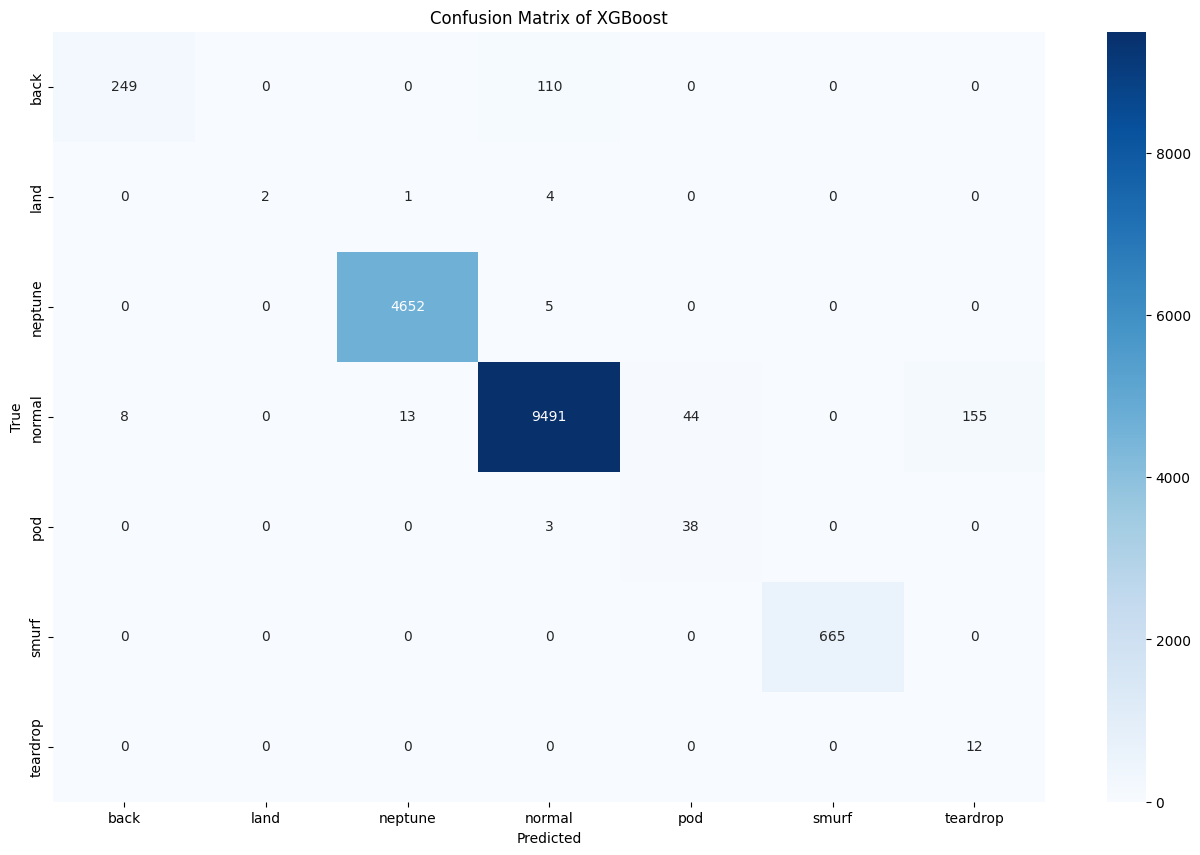

In [90]:
# Plot confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(results['XGBoost']['conf_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()

## Deep Learning Time

In [20]:
import tensorflow as tf
import time

2024-06-04 04:11:19.655714: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 04:11:19.655867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 04:11:19.784655: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Data Reshaping

In [25]:
# Reshape the data for the autoencoder
balanced = False
if balanced:
    # Uses numpy
    x_train_reshaped = x_train_resampled.reshape((x_train_resampled.shape[0], x_train_resampled.shape[1], 1))
else:
    # Uses pandas
    x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [26]:
input_dim = x_train_reshaped.shape[1]
print(input_dim)

20


### Autoencoder Creation

In [29]:
# Define the autoencoder model
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim, 1)),
    tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),
    tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu', name='bottleneck'),
    tf.keras.layers.Dense(((input_dim // 4)) * 16, activation='relu'),
    tf.keras.layers.Reshape(((input_dim // 4), 16)),
    tf.keras.layers.UpSampling1D(2),
    tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'),
    tf.keras.layers.UpSampling1D(2),
    tf.keras.layers.Conv1D(1, 3, activation='tanh', padding='same')
])

# Compile the autoencoder
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Print the model summary
print(autoencoder.summary())

# Extract the encoder part
encoder = tf.keras.Sequential(autoencoder.layers[:7])
encoder.build(input_shape=(None, input_dim, 1))
print(encoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 20, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 10, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 16)             │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 5, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_4 (UpSampling1D)  │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 10, 16)         │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_5 (UpSampling1D)  │ (None, 20, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 20, 1)          │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,169 (20.19 KB)

 Trainable params: 5,169 (20.19 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 20, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 10, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 16)             │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         1,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,336 (16.94 KB)

 Trainable params: 4,336 (16.94 KB)

 Non-trainable params: 0 (0.00 B)

None


### Autoencoder Training

In [30]:
autoencoder_start_time = time.time()
# Train the autoencoder on both benign and attack samples
autoencoder.fit(
    x_train_reshaped, 
    x_train_reshaped, 
    epochs=200, 
    batch_size=64, 
    shuffle=True, 
    validation_split=0.2,
)
autoencoder_end_time = time.time()
autoencoder_training_time = autoencoder_end_time - autoencoder_start_time


Epoch 1/200
  69/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9004  

I0000 00:00:1717474396.209611     145 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1416/1416 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.4591 - val_loss: 0.5115
Epoch 2/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2931 - val_loss: 0.5055
Epoch 3/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2942 - val_loss: 0.5025
Epoch 4/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3048 - val_loss: 0.5001
Epoch 5/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3092 - val_loss: 0.4972
Epoch 6/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2863 - val_loss: 0.4960
Epoch 7/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3009 - val_loss: 0.4951
Epoch 8/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2827 - val_loss: 0.4943
Epoch 9/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2812 - val_loss: 0.4941
Epoch 10/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2633 - val_loss: 0.4931
Epoch 11/200
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2906 - val_loss: 0.4928
Epoch 12/200
1416/1416 ━━━━━━━

### Encoding of Data using Trained Autoencoder for XGB

In [31]:
# Encode the train and test data using the trained encoder
encoded_train = encoder.predict(x_train_reshaped)
encoded_test = encoder.predict(x_test_reshaped)

3540/3540 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Combine Encoded and Original Features

In [39]:
# Flatten the encoded data for combining
encoded_train_flat = encoded_train.reshape((encoded_train.shape[0], -1))
encoded_test_flat = encoded_test.reshape((encoded_test.shape[0], -1))

# Combine original and encoded features
combined_train = np.concatenate((x_train, encoded_train_flat), axis=1)
combined_test = np.concatenate((x_test, encoded_test_flat), axis=1)

## Train XGB of Hybrid Model

In [40]:
# Create the XGBoost classifier
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Train the model
start_train_time = time.time()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, verbose=True)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Predict on the test set
start_pred_time = time.time()
y_pred = model.predict(x_test)
end_pred_time = time.time()
pred_time = end_pred_time - start_pred_time

# Decode labels for evaluation
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
precision = precision_score(y_test_decoded, y_pred_decoded, average='macro', zero_division=1)
recall = recall_score(y_test_decoded, y_pred_decoded, average='macro', zero_division=1)
f1 = f1_score(y_test_decoded, y_pred_decoded, average='macro', zero_division=1)
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
class_report = classification_report(y_test_decoded, y_pred_decoded, zero_division=1)

# Store the results
results = {}
results["xgboost"] = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "conf_matrix": conf_matrix,
    "class_report": class_report,
    "train_time": train_time,
    "pred_time": pred_time
}

# Print evaluation metrics
print(f'--- {"xgboost"} ---')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Training Time: {train_time} seconds')
print(f'Prediction Time: {pred_time} seconds')

--- xgboost ---
Accuracy: 0.9778022262490292
Precision: 0.7840644201235732
Recall: 0.840344070679181
F1 Score: 0.7121591748996231
Confusion Matrix:
[[ 249    0    0  110    0    0    0]
 [   0    2    1    4    0    0    0]
 [   0    0 4652    5    0    0    0]
 [   8    0   13 9491   44    0  155]
 [   0    0    0    3   38    0    0]
 [   0    0    0    0    0  665    0]
 [   0    0    0    0    0    0   12]]
Classification Report:
              precision    recall  f1-score   support

        back       0.97      0.69      0.81       359
        land       1.00      0.29      0.44         7
     neptune       1.00      1.00      1.00      4657
      normal       0.99      0.98      0.98      9711
         pod       0.46      0.93      0.62        41
       smurf       1.00      1.00      1.00       665
    teardrop       0.07      1.00      0.13        12

    accuracy                           0.98     15452
   macro avg       0.78      0.84      0.71     15452
weighted avg       0

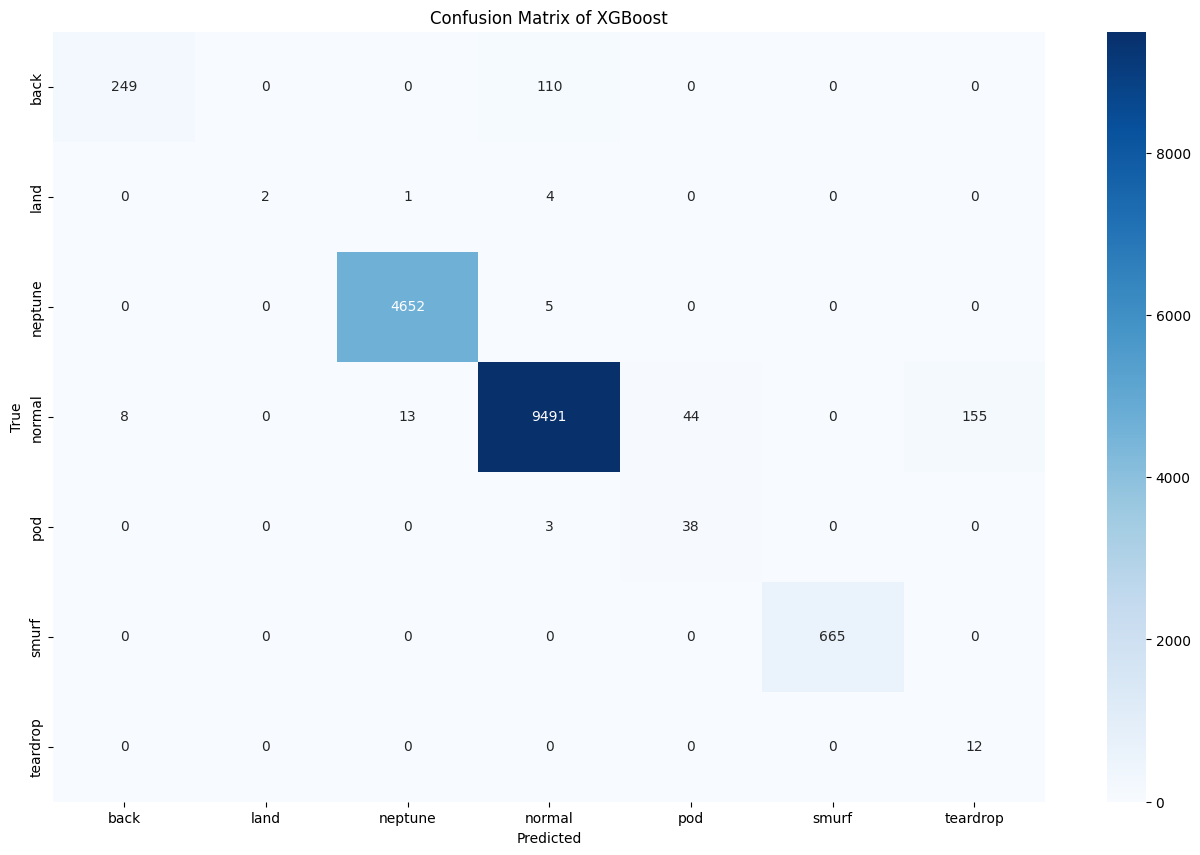

In [41]:
# Plot confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(results['xgboost']['conf_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()